In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=50)

In [3]:
faces.data.shape

(1560, 2914)

In [4]:
faces.images[0].shape

(62, 47)

In [5]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [6]:
faces.target_names.size

12

In [9]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [10]:
faces.target_names[4]

'Gerhard Schroeder'

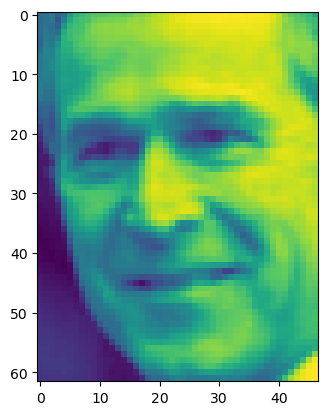

In [13]:
plt.imshow(faces.images[4])

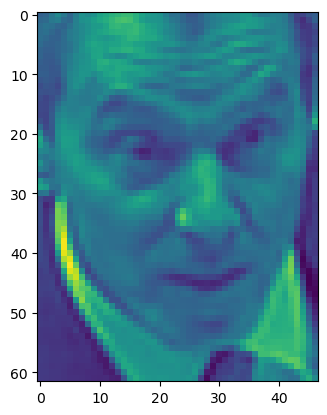

In [14]:
plt.imshow(faces.images[0])

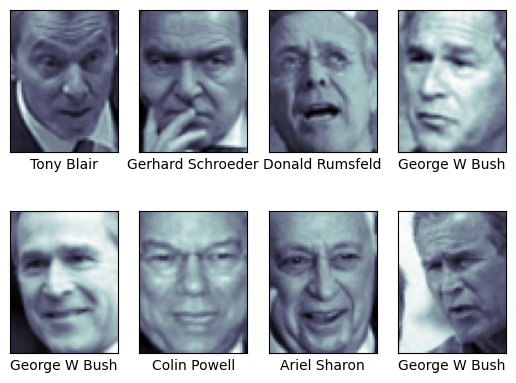

In [19]:
fig,ax=plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx],cmap='bone')
    axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [21]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline


In [23]:
pcamodel=PCA(n_components=150,whiten=True)
svmmodel=SVC(kernel='rbf',class_weight='balanced')
mdl=make_pipeline(pcamodel,svmmodel)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test=train_test_split(faces.data,faces.target,test_size=0.2)

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid={'svc__C':[1,5,15,30],'svc__gamma':[0.00001,0.00005,0.0001,0.005]}
grid=GridSearchCV(mdl,param_grid)

In [28]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]})

In [29]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


In [30]:
mdl=grid.best_estimator_

In [31]:
y_pred=mdl.predict(x_test)

In [32]:
y_test

array([ 1,  2,  1,  3,  3,  3,  7,  1,  0,  1,  1,  1,  1,  4,  3,  1,  3,
        2, 11,  5,  3,  3,  2,  3,  3,  1,  3,  7,  3,  8,  1,  2, 10,  9,
       11,  3,  1,  2,  3,  3,  3,  6,  3, 10,  3,  0, 10,  3, 11,  7,  3,
        9,  3,  8,  2,  7,  4,  4,  8,  8,  3,  2, 11, 11,  0,  3,  3,  3,
        2,  1,  0,  0,  3,  0,  3, 10,  3,  0,  1,  3,  0,  1,  7,  1,  0,
        3, 11,  3, 11,  3,  1, 11,  9,  2, 10,  3,  1,  3,  3,  3,  4,  3,
        3, 11,  3,  3,  4,  3, 11,  3,  6,  7,  3, 11,  0,  3,  0, 11,  1,
        3,  7,  1,  1,  2,  8,  3,  3, 10,  3,  5,  3,  3,  2,  1,  3, 10,
        6,  5,  2,  0,  3,  4,  3,  4,  3,  3,  5,  6,  0,  8, 11,  0, 11,
        2,  4,  4,  1,  3,  9,  3,  1,  3,  4,  1,  1,  8,  3,  3,  3,  3,
        9, 11,  3,  3,  0,  3,  3,  5,  9,  3,  2,  3, 11,  5,  3,  3,  7,
        4,  3,  3,  3,  1,  4,  1,  3,  1,  1,  2,  3,  3,  5,  3, 11,  4,
        1,  5,  3,  3,  3,  2,  1,  3,  3,  1,  9,  2,  8,  1,  3,  3,  5,
       11, 11,  9,  9,  3

In [33]:
y_pred

array([ 1,  3,  1,  3,  3,  3,  7,  3,  0,  1,  1,  5,  1,  4,  3,  1,  3,
        2, 11,  3,  3,  3,  2,  1,  3,  1,  3,  7,  3,  4,  3,  2, 10,  9,
        4,  3,  1,  2,  3,  3,  3,  6,  3, 10,  3,  0, 10,  3,  3,  7,  3,
        9,  1,  8,  2,  3,  4,  4,  3,  3,  3,  2,  3, 11,  0,  3,  3,  3,
        3,  1,  0,  0,  3,  0,  3, 10,  3,  3,  1,  3,  1,  3,  3,  1,  0,
        3, 11,  3,  6,  3,  1, 11,  9,  2, 10,  3,  1,  3,  3,  3,  4,  3,
        3, 11,  3,  3,  3,  3, 11,  3, 10,  7,  3,  3,  0,  3,  0, 11,  1,
        3,  7,  1,  1,  2,  1,  3,  3, 10,  1,  3,  3,  3,  2,  1,  3, 10,
        2,  5,  1,  1,  3,  0,  3,  4,  3,  3,  1,  3,  0,  1, 11,  1, 11,
        3,  4,  3,  1,  3,  9,  3,  1,  3,  4,  1,  1,  8,  3,  3,  3,  3,
        9, 11,  3,  3,  0,  3,  3,  5,  9,  3,  2,  3, 11,  1,  3,  3,  4,
        1,  3,  3,  3,  1,  4,  1,  3,  1,  1,  3,  3,  3,  5,  3, 11,  4,
        1,  3,  3,  3,  3,  2,  1,  3,  3,  3,  9,  2,  8,  1,  3,  3,  3,
       11, 11,  9,  5,  3

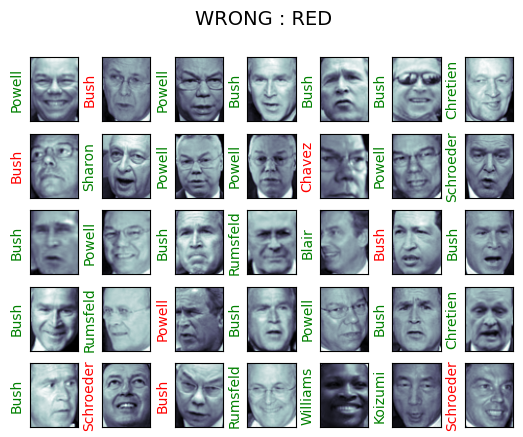

In [40]:
fig,ax=plt.subplots(5,7)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(x_test[idx].reshape(62,47),cmap='bone')
    axidx.set(xticks=[],yticks=[])
    axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1],color='green' if y_pred[idx]==y_test[idx] else 'red')
    fig.suptitle('WRONG : RED',size=14)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.94      0.71      0.81        21
     Colin Powell       0.70      0.83      0.76        48
  Donald Rumsfeld       0.94      0.73      0.82        22
    George W Bush       0.80      0.97      0.88       115
Gerhard Schroeder       0.81      0.68      0.74        19
      Hugo Chavez       0.75      0.50      0.60        12
   Jacques Chirac       0.67      0.33      0.44         6
    Jean Chretien       1.00      0.67      0.80        12
    John Ashcroft       1.00      0.44      0.62         9
Junichiro Koizumi       1.00      0.90      0.95        10
  Serena Williams       0.89      1.00      0.94         8
       Tony Blair       0.92      0.77      0.84        30

         accuracy                           0.82       312
        macro avg       0.87      0.71      0.77       312
     weighted avg       0.83      0.82      0.81       312



Text(113.92222222222219, 0.5, 'Predicted label')

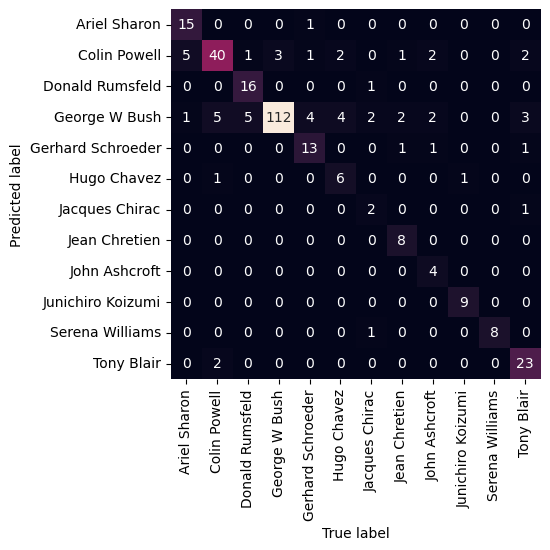

In [47]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')